In [253]:
# Import Libraries

# data manipulation and analysis
import pandas as pd

# multi-dimensional arrays and matrices
# mathematical functions
import numpy as np

# parsing & processing Python Source Code
# convert strings of Python code into executable code
import ast # Abstract Syntax Trees (AST) module

# data visualization
import matplotlib.pyplot as plt # creating static, animated, and interactive visualizations
import seaborn as sns # interface for drawing & statistical graphics
import mplcursors # interactive data cursors

# database adapter for Python
import psycopg2 # allows interaction with PostgreSQL
import pandas as pd

# probability distributions and statistical functions
from scipy.stats import norm 
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

In [254]:
# Read uncleaned disney_movies.csv file
df_2 = pd.read_csv(r'C:\Users\ashwi\Documents\Data Analytics\QA\Data\Cleaned\Python\df_2.csv', index_col=False, sep=',')

In [255]:
df_2

,movie_name,Running time (min),Release date,Box office
0,Pinocchio (1940film),01:28,1940-02-07,164000000
1,Fantasia (1940film),02:06,1940-11-13,76400000
2,The Reluctant Dragon (1941film),01:14,1941-06-27,960000
3,Dumbo,01:04,1941-10-23,1300000
4,Bambi,01:10,1942-08-09,267399999
...,...,...,...,...
366,Chang Can Dunk,01:49,2023-03-10,NaN
367,Peter Pan Wendy,01:49,2023-04-28,NaN
368,Crater (film),01:45,2023-05-12,NaN
369,Worlds Best (film),01:41,2023-06-23,NaN


In [256]:
df_2.columns

Index(['movie_name', 'Running time (min)', 'Release date', 'Box office'], dtype='object')

In [257]:
# Define a function to process the movie names
def process_movie_name(name):
    import re
    # Regular expression to match sequences of 4 numbers followed by alpha characters
    pattern = r'(\d{4})([a-zA-Z]+)'
    # Check if the name contains parentheses
    if '(' in name and ')' in name:
        # If it does, apply the regular expression to the part inside the parentheses
        name = re.sub(pattern, r'\1 \2', name)
    return name

# Apply the function to the movie_name column
df_2['movie_name'] = df_2['movie_name'].apply(process_movie_name)

# Display the updated DataFrame
df_2

,movie_name,Running time (min),Release date,Box office
0,Pinocchio (1940 film),01:28,1940-02-07,164000000
1,Fantasia (1940 film),02:06,1940-11-13,76400000
2,The Reluctant Dragon (1941 film),01:14,1941-06-27,960000
3,Dumbo,01:04,1941-10-23,1300000
4,Bambi,01:10,1942-08-09,267399999
...,...,...,...,...
366,Chang Can Dunk,01:49,2023-03-10,NaN
367,Peter Pan Wendy,01:49,2023-04-28,NaN
368,Crater (film),01:45,2023-05-12,NaN
369,Worlds Best (film),01:41,2023-06-23,NaN


In [258]:
df_2.to_csv('df_3.csv', index=False, sep=',', encoding='utf-8')

In [259]:
# Read uncleaned disney_movies.csv file
df_3 = pd.read_csv(r'C:\Users\ashwi\Documents\Data Analytics\QA\Data\Cleaned\Python\df_3.csv', index_col=False, sep=',')

# df_3

## Data Exploration

In [260]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_name          371 non-null    object 
 1   Running time (min)  369 non-null    object 
 2   Release date        371 non-null    object 
 3   Box office          269 non-null    float64
dtypes: float64(1), object(3)
memory usage: 11.7+ KB


In [261]:
df_3.describe()

,Box office
count,269
mean,1935761693
std,30481216357
min,0
25%,5100000
50%,22900000
75%,72200000
max,500000302000


In [262]:
df_3['Box office']

0     164000000
1      76400000
2        960000
3       1300000
4     267399999
         ...   
366         NaN
367         NaN
368         NaN
369         NaN
370         NaN
Name: Box office, Length: 371, dtype: float64

In [263]:
# Describe the DataFrame with floating-point precision
df_3_description = df_3.describe()

# Display the summary statistics with float format
with pd.option_context('display.float_format', '{:.2f}'.format):
    print(df_3_description)

           Box office
count          269.00
mean    1935761693.45
std    30481216357.08
min              0.16
25%        5100000.00
50%       22900000.00
75%       72200000.00
max   500000302000.00


In [264]:
df_3.isnull().sum()

movie_name              0
Running time (min)      2
Release date            0
Box office            102
dtype: int64

Box office contains 102 null values

## Data Cleaning

### Handling Missing Values

In [265]:
# df_3.drop(na)

# see: 1 import_and_duplicates_columns.ipynb
# see: 2 quality assurance.ipynb

# Drop rows with missing values
df_3_cleaned = df_3.dropna()

# Checking if there are still missing values after dropping
print(df_3_cleaned.isnull().sum())

movie_name            0
Running time (min)    0
Release date          0
Box office            0
dtype: int64


In [266]:
df_3

,movie_name,Running time (min),Release date,Box office
0,Pinocchio (1940 film),01:28,1940-02-07,164000000
1,Fantasia (1940 film),02:06,1940-11-13,76400000
2,The Reluctant Dragon (1941 film),01:14,1941-06-27,960000
3,Dumbo,01:04,1941-10-23,1300000
4,Bambi,01:10,1942-08-09,267399999
...,...,...,...,...
366,Chang Can Dunk,01:49,2023-03-10,NaN
367,Peter Pan Wendy,01:49,2023-04-28,NaN
368,Crater (film),01:45,2023-05-12,NaN
369,Worlds Best (film),01:41,2023-06-23,NaN


In [267]:
# df_3.fillna()

# see: 1 import_and_duplicates_columns.ipynb
# see: 2 quality assurance.ipynb

# Fill missing values in 'Running time (min)' with the mean value of the column
df_3['Box office'].fillna(df_3['Box office'].mean(), inplace=True)

# Fill missing values in 'Box office' with 0
df_3['Box office'].fillna(0, inplace=True)

In [268]:
df_3

,movie_name,Running time (min),Release date,Box office
0,Pinocchio (1940 film),01:28,1940-02-07,164000000
1,Fantasia (1940 film),02:06,1940-11-13,76400000
2,The Reluctant Dragon (1941 film),01:14,1941-06-27,960000
3,Dumbo,01:04,1941-10-23,1300000
4,Bambi,01:10,1942-08-09,267399999
...,...,...,...,...
366,Chang Can Dunk,01:49,2023-03-10,1935761693
367,Peter Pan Wendy,01:49,2023-04-28,1935761693
368,Crater (film),01:45,2023-05-12,1935761693
369,Worlds Best (film),01:41,2023-06-23,1935761693


### Remove Duplicates

In [269]:
# see: 1 import_and_duplicates_columns.ipynb
# see: 2 quality assurance.ipynb

In [270]:
df_3

,movie_name,Running time (min),Release date,Box office
0,Pinocchio (1940 film),01:28,1940-02-07,164000000
1,Fantasia (1940 film),02:06,1940-11-13,76400000
2,The Reluctant Dragon (1941 film),01:14,1941-06-27,960000
3,Dumbo,01:04,1941-10-23,1300000
4,Bambi,01:10,1942-08-09,267399999
...,...,...,...,...
366,Chang Can Dunk,01:49,2023-03-10,1935761693
367,Peter Pan Wendy,01:49,2023-04-28,1935761693
368,Crater (film),01:45,2023-05-12,1935761693
369,Worlds Best (film),01:41,2023-06-23,1935761693


In [271]:
# Convert 'Box office' column to float data type
df_3['Box office'] = df_3['Box office'].astype(float)

# Round the values to remove decimal places
df_3['Box office'] = df_3['Box office'].round(0)

# Display the DataFrame to verify changes
df_3

,movie_name,Running time (min),Release date,Box office
0,Pinocchio (1940 film),01:28,1940-02-07,164000000
1,Fantasia (1940 film),02:06,1940-11-13,76400000
2,The Reluctant Dragon (1941 film),01:14,1941-06-27,960000
3,Dumbo,01:04,1941-10-23,1300000
4,Bambi,01:10,1942-08-09,267399999
...,...,...,...,...
366,Chang Can Dunk,01:49,2023-03-10,1935761693
367,Peter Pan Wendy,01:49,2023-04-28,1935761693
368,Crater (film),01:45,2023-05-12,1935761693
369,Worlds Best (film),01:41,2023-06-23,1935761693


In [272]:
# Set display options to show full float values without scientific notation
pd.set_option('display.float_format', lambda x: '{:.0f}'.format(x))

# Display the DataFrame to see the updated representation
df_3

,movie_name,Running time (min),Release date,Box office
0,Pinocchio (1940 film),01:28,1940-02-07,164000000
1,Fantasia (1940 film),02:06,1940-11-13,76400000
2,The Reluctant Dragon (1941 film),01:14,1941-06-27,960000
3,Dumbo,01:04,1941-10-23,1300000
4,Bambi,01:10,1942-08-09,267399999
...,...,...,...,...
366,Chang Can Dunk,01:49,2023-03-10,1935761693
367,Peter Pan Wendy,01:49,2023-04-28,1935761693
368,Crater (film),01:45,2023-05-12,1935761693
369,Worlds Best (film),01:41,2023-06-23,1935761693


In [273]:
# Find rows with empty values
empty_rows = df_3[df_3.isnull().any(axis=1)]

# Display the rows with empty values
print(empty_rows)

                 movie_name Running time (min) Release date  Box office
310    Anaganaga O Dheerudu                NaN   2011-01-14  1935761693
340  Ghost of the Mountains                NaN   2017-06-30  1935761693


In [274]:
df_3.to_csv('df_3.csv', index=False, sep=',', encoding='utf-8')

In [275]:
# Read uncleaned disney_movies.csv file
df_3 = pd.read_csv(r'C:\Users\ashwi\Documents\Data Analytics\QA\Data\Cleaned\Python\df_3.csv', index_col=False, sep=',')

In [276]:
df_3.head(1)

,movie_name,Running time (min),Release date,Box office
0,Pinocchio (1940 film),01:28,1940-02-07,164000000


## Visualization libraries

### Matplotlib

In [277]:
df_3.columns

Index(['movie_name', 'Running time (min)', 'Release date', 'Box office'], dtype='object')

In [278]:
df_3.dtypes

movie_name             object
Running time (min)     object
Release date           object
Box office            float64
dtype: object

#### Line Plot of Total Box office Earnings per Decade

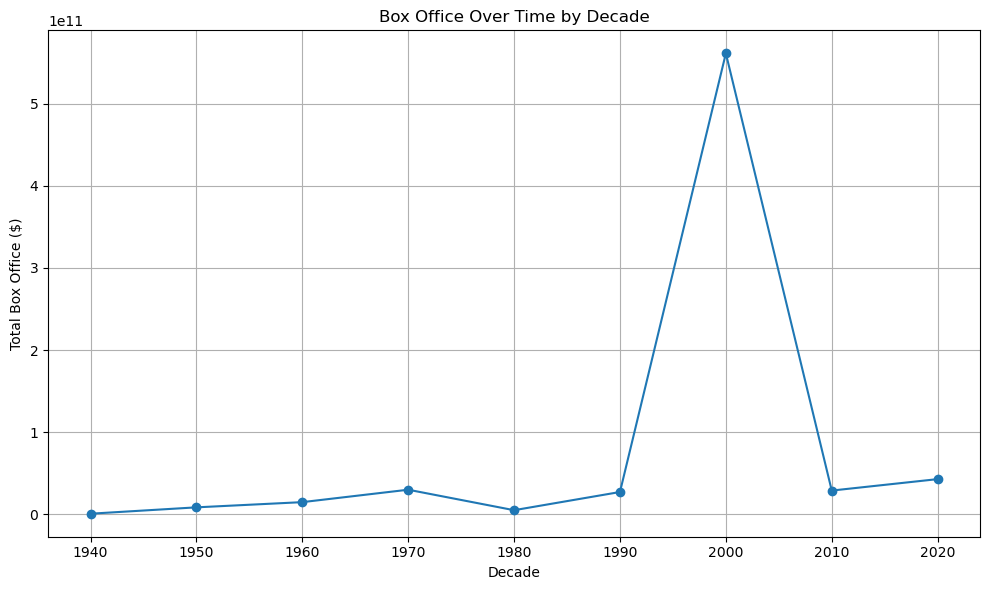

In [292]:
# Round release date to decade
df_3['Decade'] = df_3['Release date'].dt.year // 10 * 10

# Group by decade and sum box office revenues
df_decade = df_3.groupby('Decade')['Box office'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_decade['Decade'], df_decade['Box office'], marker='o', linestyle='-')
plt.title('Box Office Over Time by Decade')
plt.xlabel('Decade')
plt.ylabel('Total Box Office ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Box Plot of Box Office Earnings per Decade

#### Scatter Plot of Running Time vs. Box Office Earnings

#### Histogram of Running Times

#### Pie Chart of Box Office Earnings

#### Seaborn

#### Plotly

#### Z-Score

#### IQR

## Statistical Analysis

### Descriptive Statistics

In [58]:
df_3.describe()

,Box office
count,2.690000e+02
mean,1.935762e+09
std,3.048122e+10
min,1.600000e-01
25%,5.100000e+06
50%,2.290000e+07
75%,7.220000e+07
max,5.000003e+11


#### Correlation analysis

In [ ]:
df_3.corr()

#### Hypothesis testing

In [ ]:
scipy.stats

In [ ]:
t-tests

In [ ]:
ANOVA

#### Regression analysis

In [ ]:
statsmodels

In [ ]:
scikit-learn